In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [10, 10]
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
raw_cases = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
raw_deaths = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
raw_recovered = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
raw_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55330,55335,55359,55384,55402,55420,55445,55473,55492,55514
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,84212,85336,86289,87528,88671,89776,90835,91987,93075,93850
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,108629,109088,109313,109559,109782,110049,110303,110513,110711,110894
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,10206,10251,10275,10312,10352,10391,10427,10463,10503,10538
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,20062,20086,20112,20163,20210,20261,20294,20329,20366,20381


In [5]:
raw_cases.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Columns: 395 entries, Province/State to 2/15/21
dtypes: float64(2), int64(391), object(2)
memory usage: 842.6+ KB


In [6]:
raw_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Columns: 395 entries, Province/State to 2/15/21
dtypes: float64(2), int64(391), object(2)
memory usage: 842.6+ KB


In [7]:
geometry = [Point(xy) for xy in zip(raw_cases['Long'], raw_cases['Lat'])]

In [8]:
geometry[:3]

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [10]:
raw_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55330,55335,55359,55384,55402,55420,55445,55473,55492,55514
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,84212,85336,86289,87528,88671,89776,90835,91987,93075,93850
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,108629,109088,109313,109559,109782,110049,110303,110513,110711,110894
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,10206,10251,10275,10312,10352,10391,10427,10463,10503,10538
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,20062,20086,20112,20163,20210,20261,20294,20329,20366,20381


In [11]:
geo_cases = gpd.GeoDataFrame(raw_cases, geometry=geometry)

In [12]:
latest_cases = raw_cases.iloc[:,-2]

/home/andres/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
No handles with labels found to put in legend.


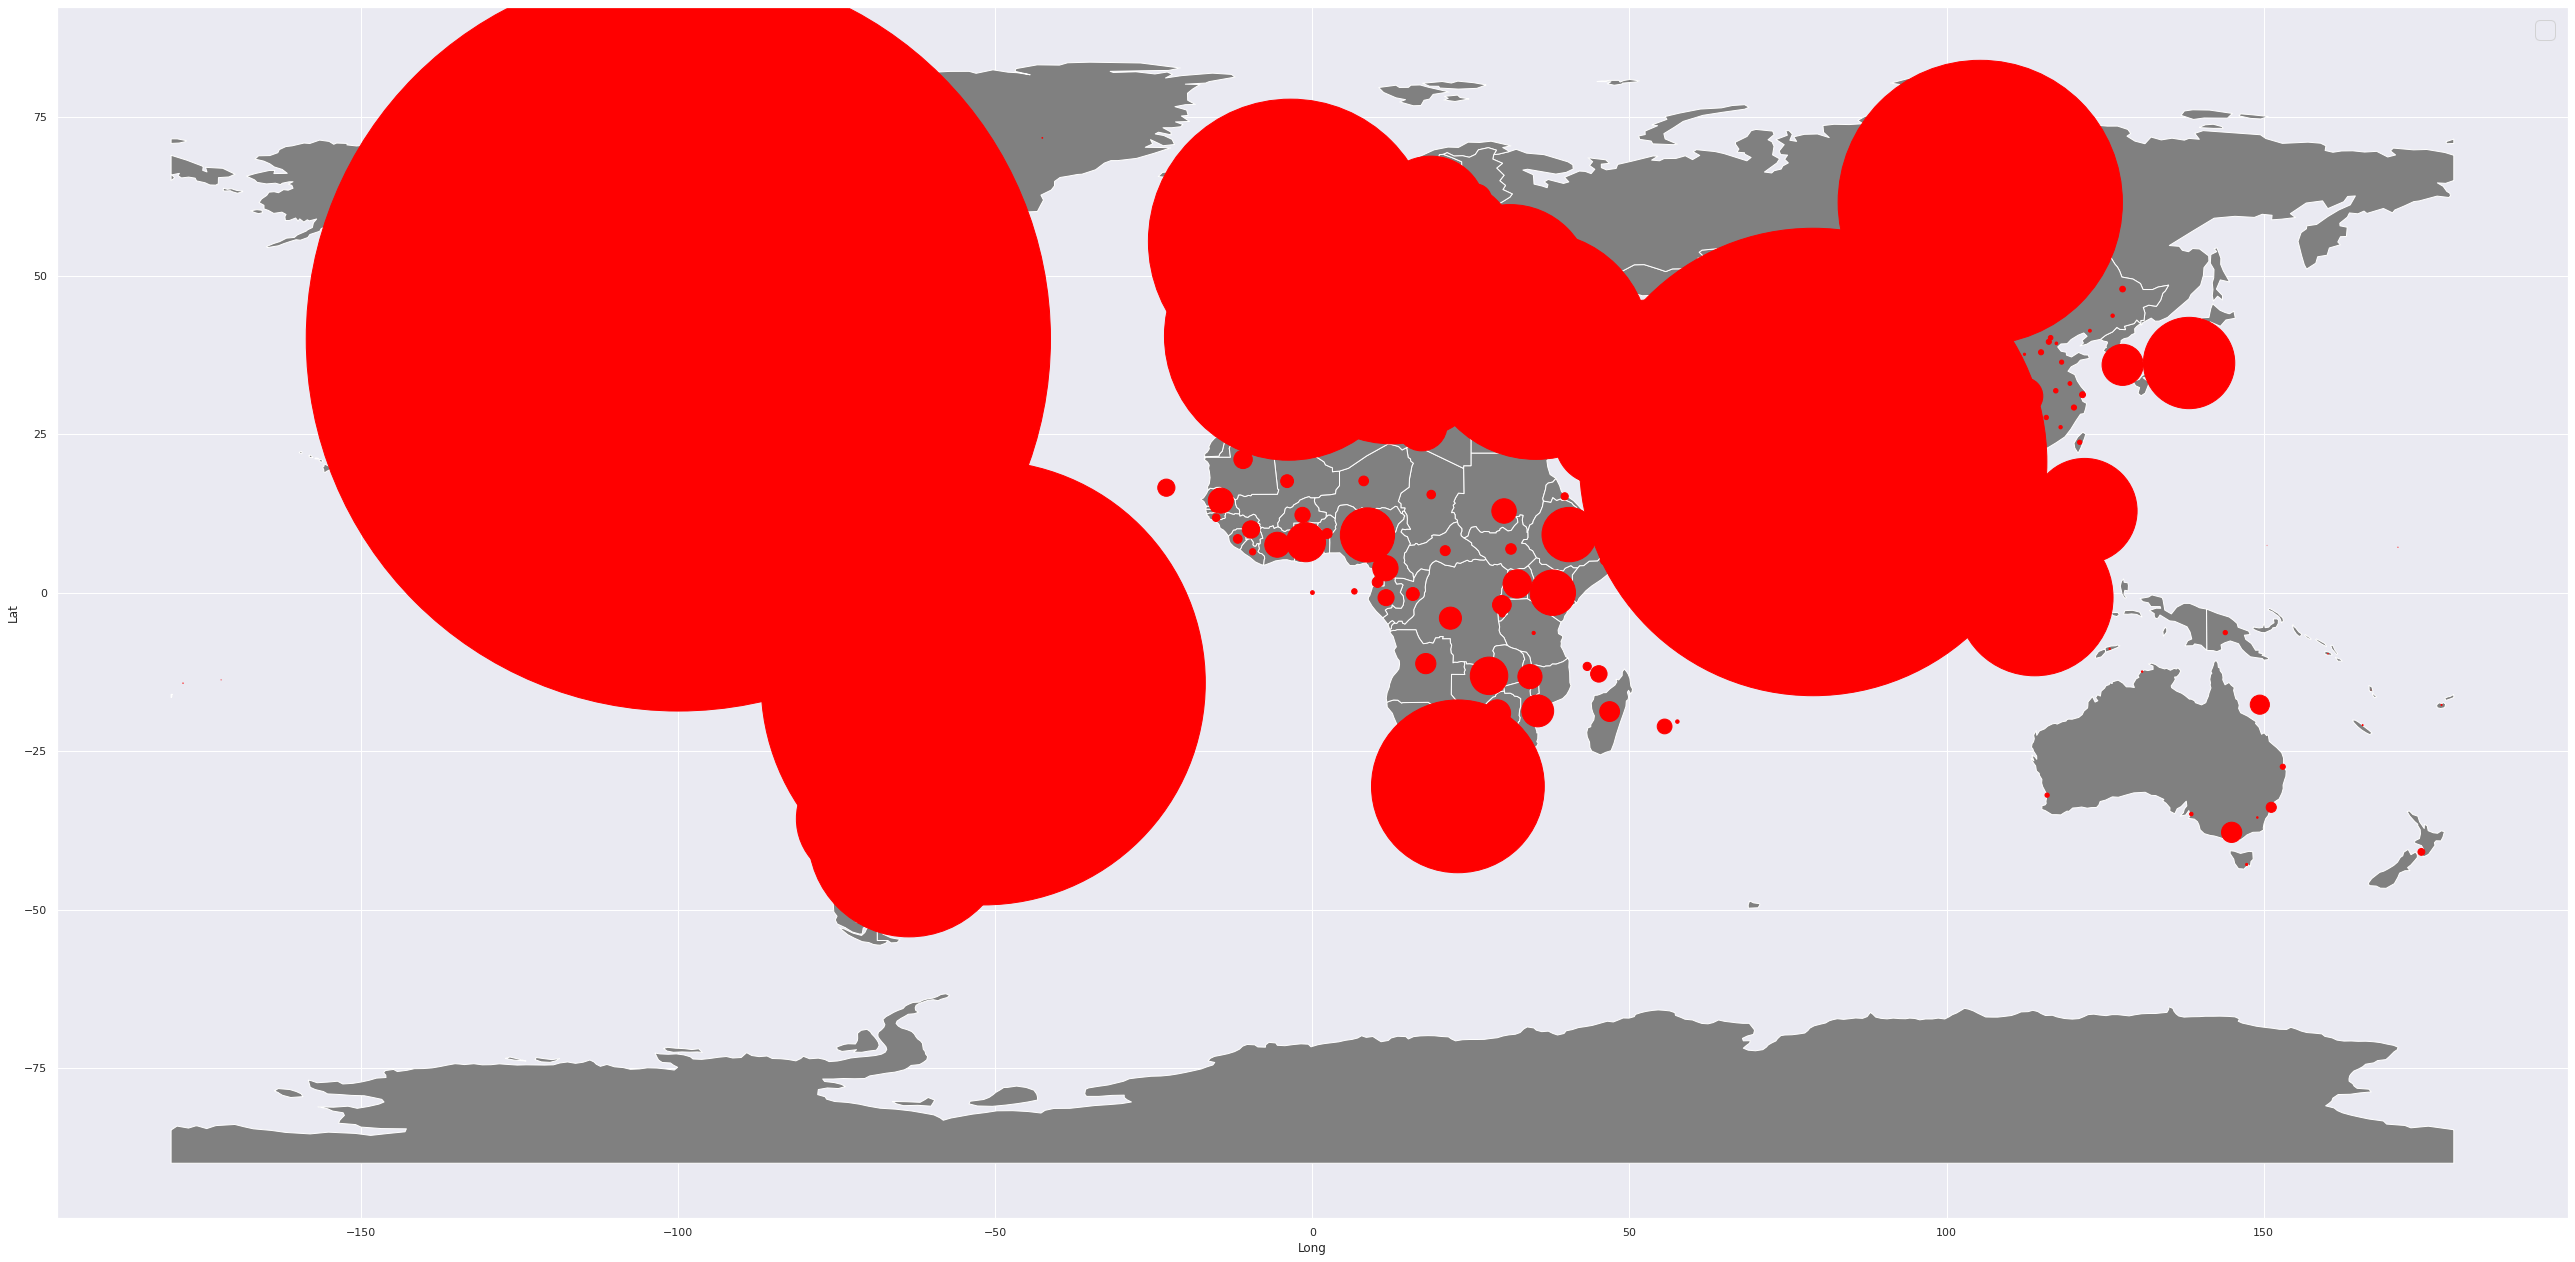

In [13]:
ax = world.plot(figsize=(45,35), color='grey')
geo_cases.crs = {'init' :'epsg:4326'}
geo_cases.to_crs(world.crs)
#geo_cases.plot(ax = ax, color='red')
raw_cases.plot(kind='scatter', x='Long', y='Lat', ax=ax, s=latest_cases/50, legend='Confirmed', color='red')
plt.legend(fontsize=25)
plt.show()

In [14]:


cases_no_states_no_geo = raw_cases.drop(['Province/State','Lat', 'Long'], axis=1)
deaths_no_states_no_geo = raw_deaths.drop(['Province/State', 'Lat', 'Long'], axis=1)
recovered_no_states_no_geo = raw_recovered.drop(['Province/State', 'Lat', 'Long'], axis=1)


In [15]:
grouped_cases = cases_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_deaths = deaths_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_recovered = recovered_no_states_no_geo.groupby('Country/Region', axis=0)

In [16]:
cases_country_only = grouped_cases.sum()
deaths_country_only = grouped_deaths.sum()
recovered_country_only = grouped_recovered.sum()

In [17]:
#Final Data Frames including only countries which we want to study
names_we_want = ['Costa Rica', 'US', 'Italy', 'Spain', 'Germany', 'China', 'Brazil', 'Korea, South', 'France', 'Uruguay']
cases = cases_country_only.loc[names_we_want]
deaths = deaths_country_only.loc[names_we_want]
recovered = recovered_country_only.loc[names_we_want]
cases = cases.T
deaths = deaths.T
recovered = recovered.T

In [18]:
recovered

Country/Region,Costa Rica,US,Italy,Spain,Germany,China,Brazil,"Korea, South",France,Uruguay
1/22/20,0,0,0,0,0,28,0,0,0,0
1/23/20,0,0,0,0,0,30,0,0,0,0
1/24/20,0,0,0,0,0,36,0,0,0,0
1/25/20,0,0,0,0,0,39,0,0,0,0
1/26/20,0,0,0,0,0,49,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2/11/21,160462,0,2185655,150376,2109508,94413,8637050,72936,244961,41426
2/12/21,160946,0,2202077,150376,2120342,94536,8691664,73227,244962,41966
2/13/21,160946,0,2216050,150376,2128002,94641,8740445,73559,244962,42505
2/14/21,160946,0,2225519,150376,2136933,94728,8765048,73794,244962,42889


In [19]:
cases.to_csv('InternationalCases.csv', index=True)
deaths.to_csv('InternationalDeaths.csv', index=True)
recovered.to_csv('InternationalRecovered.csv', index=True)

In [20]:
cases_camcar = cases_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
deaths_camcar = deaths_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
cases_camcar = cases_camcar.T
deaths_camcar = deaths_camcar.T

In [21]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2/11/21,198756,330075,165532,6347,56653,158355,226714,18237,7632,35772
2/12/21,199187,330985,166283,6347,57428,159024,227764,18527,7637,36595
2/13/21,199187,331692,167071,6347,57428,159788,228895,18830,7642,37483
2/14/21,199187,332179,167279,6347,57428,160171,229768,19035,7642,38289


In [22]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2/11/21,2710,5572,6023,171,1719,3838,2904,363,136,253
2/12/21,2714,5595,6057,171,1727,3848,2917,368,137,257
2/13/21,2714,5621,6094,171,1734,3857,2932,372,138,261
2/14/21,2714,5636,6124,171,1742,3866,2944,374,138,266


In [23]:
cases_camcar = cases_camcar.loc['2/29/20':]
deaths_camcar = deaths_camcar.loc['2/29/20':]

In [24]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,1,0,0,0
3/2/20,0,0,0,0,0,0,1,0,0,0
3/3/20,0,0,0,0,0,0,1,0,0,0
3/4/20,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2/11/21,198756,330075,165532,6347,56653,158355,226714,18237,7632,35772
2/12/21,199187,330985,166283,6347,57428,159024,227764,18527,7637,36595
2/13/21,199187,331692,167071,6347,57428,159788,228895,18830,7642,37483
2/14/21,199187,332179,167279,6347,57428,160171,229768,19035,7642,38289


In [25]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,0,0,0,0
3/2/20,0,0,0,0,0,0,0,0,0,0
3/3/20,0,0,0,0,0,0,0,0,0,0
3/4/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2/11/21,2710,5572,6023,171,1719,3838,2904,363,136,253
2/12/21,2714,5595,6057,171,1727,3848,2917,368,137,257
2/13/21,2714,5621,6094,171,1734,3857,2932,372,138,261
2/14/21,2714,5636,6124,171,1742,3866,2944,374,138,266


In [26]:
cases_camcar.to_csv('CasesCAMCAR.csv', index=True)
deaths_camcar.to_csv('DeathsCAMCAR.csv', index=True)

In [27]:
def growth_factor_df(df):
    indices = df.index.values
    cols = df.columns.values
    zeros = np.zeros(df.shape)
    rows = df.shape[0]
    columns = df.shape[1]
    for j in range(columns):
        for i in range(1,rows):
            day_n = df.iloc[i,j]
            day_prev = df.iloc[i-1,j]
            if day_prev == 0:
                zeros[i,j] = 0
            else:
                zeros[i,j] = day_n/day_prev
    growth_df = pd.DataFrame(data=zeros, columns=cols, index=indices)
    return growth_df

In [28]:
camcar_gf = growth_factor_df(cases_camcar)

In [29]:
camcar_gf

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3/1/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3/2/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/3/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/4/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2/11/21,1.002108,1.002150,1.004771,1.0,1.000000,1.005633,1.005508,1.018372,1.000131,1.024340
2/12/21,1.002168,1.002757,1.004537,1.0,1.013680,1.004225,1.004631,1.015902,1.000655,1.023007
2/13/21,1.000000,1.002136,1.004739,1.0,1.000000,1.004804,1.004966,1.016355,1.000655,1.024266
2/14/21,1.000000,1.001468,1.001245,1.0,1.000000,1.002397,1.003814,1.010887,1.000000,1.021503


In [30]:
camcar_gf.to_csv('GrowthFactorCAMCAR.csv', index=True)

In [31]:
temp = raw_cases[0 < raw_cases['Lat']]

In [32]:
temp = temp[ temp['Lat'] < 45]

In [33]:
temp = temp[-45 > temp['Long']]

In [34]:
temp = temp[temp['Long'] > -105]

In [35]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,geometry
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,299,316,316,350,381,419,427,427,443,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,8256,8289,8289,8289,8311,8311,8311,8311,8311,POINT (-78.03589 25.02588)
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,1709,1732,1814,1857,1904,1947,2061,2061,2268,POINT (-59.54320 13.19390)
24,NaN,Belize,17.189900,-88.497600,0,0,0,0,0,0,...,12037,12070,12079,12107,12114,12134,12145,12145,12175,POINT (-88.49760 17.18990)
47,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,1585,1586,1587,1588,1590,1590,1592,1593,1594,POINT (-63.74430 44.68200)
91,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,2157216,2161462,2166904,2173347,2179641,2185169,2190116,2195039,2198549,POINT (-74.29730 4.57090)
95,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,196438,197435,197852,198338,198756,199187,199187,199187,200024,POINT (-83.75340 9.74890)
98,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,32831,33484,34064,34922,35772,36595,37483,38289,39004,POINT (-77.78117 21.52176)
106,NaN,Dominica,15.415000,-61.371000,0,0,0,0,0,0,...,121,121,121,121,121,121,121,121,134,POINT (-61.37100 15.41500)
107,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,223398,224119,224538,225472,226714,227764,228895,229768,230563,POINT (-70.16270 18.73570)


In [36]:
temp.drop([24,47,91,106,120,121,125,136,181,192, 215, 217, 236, 249, 253, 254, 255, 261, 262, 267], axis=0, inplace=True)

In [37]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,geometry
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,299,316,316,350,381,419,427,427,443,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,8256,8289,8289,8289,8311,8311,8311,8311,8311,POINT (-78.03589 25.02588)
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,1709,1732,1814,1857,1904,1947,2061,2061,2268,POINT (-59.54320 13.19390)
95,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,196438,197435,197852,198338,198756,199187,199187,199187,200024,POINT (-83.75340 9.74890)
98,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,32831,33484,34064,34922,35772,36595,37483,38289,39004,POINT (-77.78117 21.52176)
107,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,223398,224119,224538,225472,226714,227764,228895,229768,230563,POINT (-70.16270 18.73570)
110,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,56237,56653,56653,56653,56653,57428,57428,57428,58023,POINT (-88.89650 13.79420)
118,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,16296,16296,16296,16296,16296,16296,16456,16456,16456,POINT (-53.12580 3.93390)
127,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,...,1234,1234,1234,1408,1408,1408,1408,1408,1408,POINT (-63.05010 18.07080)
137,NaN,Guatemala,15.783500,-90.230800,0,0,0,0,0,0,...,163137,163247,163993,164746,165532,166283,167071,167279,167383,POINT (-90.23080 15.78350)


In [38]:
len(temp)

22

In [39]:
cases_camcar_all = temp[['Province/State', 'Country/Region']]

In [40]:
cols = temp.columns.values
last_two_days = cols[-3:-1]
last_two_days[0]

'2/14/21'

In [41]:
cases_camcar_all[[last_two_days[0], last_two_days[1]]] = temp.iloc[:,-3:-1]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [42]:
cases_camcar_all = cases_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [43]:
cases_camcar_all = cases_camcar_all.drop('index', axis=1)

In [44]:
cases_camcar_all

,Province/State,Country/Region,2/14/21,2/15/21
0,NaN,Panama,332179,332679
1,NaN,Dominican Republic,229768,230563
2,NaN,Costa Rica,199187,200024
3,NaN,Guatemala,167279,167383
4,NaN,Honduras,160171,160983
5,NaN,El Salvador,57428,58023
6,NaN,Cuba,38289,39004
7,NaN,Jamaica,19035,19305
8,French Guiana,France,16456,16456
9,NaN,Haiti,12143,12143


In [45]:
cases_camcar_all.to_csv('All_CAMCAR_Cases.csv', index=True)

In [46]:
temp_deaths = raw_deaths[0 < raw_deaths['Lat']]

In [47]:
temp_deaths = temp_deaths[ temp_deaths['Lat'] < 45]
temp_deaths = temp_deaths[-45 > temp_deaths['Long']]
temp_deaths = temp_deaths[temp_deaths['Long'] > -105]

In [48]:
temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,7,7,7,8,9,9,9,9,9,9
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,176,176,176,176,176,178,178,178,178,178
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,18,18,18,20,20,20,21,23,23,24
24,NaN,Belize,17.189900,-88.497600,0,0,0,0,0,0,...,306,306,307,310,313,313,313,313,313,313
47,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,65,65,65,65,65,65,65,65,65,65
91,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,55693,55993,56290,56507,56733,56983,57196,57425,57605,57786
95,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,2672,2672,2692,2698,2701,2710,2714,2714,2714,2730
98,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,233,238,240,244,249,253,257,261,266,269
106,NaN,Dominica,15.415000,-61.371000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,2801,2831,2843,2864,2883,2904,2917,2932,2944,2959


In [49]:
temp_deaths.drop([24,47,91,106,120,121,125,136,181,192, 215, 217, 236, 249, 253, 254, 255, 261, 262, 267], axis=0, inplace=True)

In [50]:

temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,7,7,7,8,9,9,9,9,9,9
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,176,176,176,176,176,178,178,178,178,178
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,18,18,18,20,20,20,21,23,23,24
95,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,2672,2672,2692,2698,2701,2710,2714,2714,2714,2730
98,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,233,238,240,244,249,253,257,261,266,269
107,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,2801,2831,2843,2864,2883,2904,2917,2932,2944,2959
110,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,1673,1681,1692,1701,1709,1719,1727,1734,1742,1750
118,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,79,79,79,79,79,79,79,80,80,80
127,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12
137,NaN,Guatemala,15.783500,-90.230800,0,0,0,0,0,0,...,5854,5884,5922,5955,5989,6023,6057,6094,6124,6150


In [51]:
deaths_camcar_all = temp_deaths[['Province/State', 'Country/Region']]

In [52]:
cols = temp_deaths.columns.values
last_two_days = cols[-2:]
last_two_days[0]

'2/14/21'

In [53]:
deaths_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_deaths.iloc[:,-2:]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [54]:
deaths_camcar_all = deaths_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [55]:
deaths_camcar_all = deaths_camcar_all.drop('index', axis=1)

In [56]:
deaths_camcar_all

,Province/State,Country/Region,2/14/21,2/15/21
0,NaN,Guatemala,6124,6150
1,NaN,Panama,5636,5642
2,NaN,Honduras,3866,3893
3,NaN,Dominican Republic,2944,2959
4,NaN,Costa Rica,2714,2730
5,NaN,El Salvador,1742,1750
6,NaN,Jamaica,374,378
7,NaN,Cuba,266,269
8,NaN,Haiti,247,247
9,NaN,Guyana,186,186


In [57]:
deaths_camcar_all.to_csv('All_CAMCAR_Deaths.csv', index=True)

In [58]:
temp_recovered = raw_recovered[0 < raw_recovered['Lat']]
temp_recovered = temp_recovered[ temp_recovered['Lat'] < 45]
temp_recovered = temp_recovered[-45 > temp_recovered['Long']]
temp_recovered = temp_recovered[temp_recovered['Long'] > -105]
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,187,187,189,189,190,197,199,199,199,205
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,6819,6819,6837,6837,6837,6931,6931,6931,6931,6931
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,1349,1400,1427,1470,1504,1547,1587,1616,1616,1639
24,NaN,Belize,17.189900,-88.497600,0,0,0,0,0,0,...,11479,11479,11509,11532,11565,11605,11623,11626,11626,11668
76,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,2022331,2027333,2034228,2048292,2055468,2065209,2072793,2078391,2083551,2090467
80,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,156181,156181,158283,158820,159586,160462,160946,160946,160946,163334
83,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,26039,26739,27594,28693,29674,30695,31534,32509,33167,33776
91,NaN,Dominica,15.415000,-61.371000,0,0,0,0,0,0,...,110,110,110,110,110,110,110,110,110,121
92,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,165659,167214,168627,169843,171186,172562,173882,175329,176788,178146
95,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,50431,50431,50999,50999,50999,50999,51983,51983,51983,52688


In [59]:
temp_recovered.drop([24,76,91,105,106,110,121,166,177,200,202,221,234,238,239,240,246,247,252], axis=0, inplace=True) #'[ 41  82 109 113 115 158 190 204 232 233 244 249 250 251] not found in axis'


In [60]:
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,187,187,189,189,190,197,199,199,199,205
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,6819,6819,6837,6837,6837,6931,6931,6931,6931,6931
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,1349,1400,1427,1470,1504,1547,1587,1616,1616,1639
80,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,156181,156181,158283,158820,159586,160462,160946,160946,160946,163334
83,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,26039,26739,27594,28693,29674,30695,31534,32509,33167,33776
92,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,165659,167214,168627,169843,171186,172562,173882,175329,176788,178146
95,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,50431,50431,50999,50999,50999,50999,51983,51983,51983,52688
103,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995
112,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,...,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050
122,NaN,Guatemala,15.783500,-90.230800,0,0,0,0,0,0,...,148917,149342,149745,150544,151319,152210,152920,153614,154130,154446


In [61]:
recovered_camcar_all = temp_recovered[['Province/State', 'Country/Region']]
cols_rec = temp_recovered.columns.values
last_two_days = cols_rec[-2:]
last_two_days[0]

'2/14/21'

In [62]:
recovered_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_recovered.iloc[:,-2:]
recovered_camcar_all = recovered_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()
recovered_camcar_all = recovered_camcar_all.drop('index', axis=1)
recovered_camcar_all

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Province/State,Country/Region,2/14/21,2/15/21
0,NaN,Panama,311783,313783
1,NaN,Dominican Republic,176788,178146
2,NaN,Costa Rica,160946,163334
3,NaN,Guatemala,154130,154446
4,NaN,Honduras,63170,63346
5,NaN,El Salvador,51983,52688
6,NaN,Cuba,33167,33776
7,NaN,Jamaica,12593,12635
8,French Guiana,France,9995,9995
9,NaN,Haiti,9354,9354


In [63]:
recovered_camcar_all.to_csv('All_CAMCAR_Recovered.csv', index=True)

In [64]:
camcar_all_cases_no_geo = temp.drop(['Lat', 'Long', 'geometry'], axis=1)
camcar_all_deaths_no_geo = temp_deaths.drop(['Lat', 'Long'], axis=1)
camcar_all_recovered_no_geo = temp_recovered.drop(['Lat', 'Long'], axis=1)


In [65]:
camcar_all_cases_no_geo.reset_index(inplace=True, drop=True)
camcar_all_deaths_no_geo.reset_index(inplace=True, drop=True) 
camcar_all_recovered_no_geo.reset_index(inplace=True, drop=True)

In [66]:
names_camcar_all_cases_no_geo = camcar_all_cases_no_geo[camcar_all_cases_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_cases_no_geo.index
camcar_all_cases_no_geo.iloc[indices, 1] = names_camcar_all_cases_no_geo
camcar_all_cases_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_cases_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,288,299,316,316,350,381,419,427,427,443
1,Bahamas,0,0,0,0,0,0,0,0,0,...,8256,8256,8289,8289,8289,8311,8311,8311,8311,8311
2,Barbados,0,0,0,0,0,0,0,0,0,...,1676,1709,1732,1814,1857,1904,1947,2061,2061,2268
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,196438,196438,197435,197852,198338,198756,199187,199187,199187,200024
4,Cuba,0,0,0,0,0,0,0,0,0,...,32011,32831,33484,34064,34922,35772,36595,37483,38289,39004
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,222148,223398,224119,224538,225472,226714,227764,228895,229768,230563
6,El Salvador,0,0,0,0,0,0,0,0,0,...,56237,56237,56653,56653,56653,56653,57428,57428,57428,58023
7,French Guiana,0,0,0,0,0,0,0,0,0,...,16296,16296,16296,16296,16296,16296,16296,16456,16456,16456
8,St Martin,0,0,0,0,0,0,0,0,0,...,1234,1234,1234,1234,1408,1408,1408,1408,1408,1408
9,Guatemala,0,0,0,0,0,0,0,0,0,...,162937,163137,163247,163993,164746,165532,166283,167071,167279,167383


In [67]:
names_camcar_all_deaths_no_geo = camcar_all_deaths_no_geo[camcar_all_deaths_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_deaths_no_geo.index
camcar_all_deaths_no_geo.iloc[indices, 1] = names_camcar_all_deaths_no_geo
camcar_all_deaths_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_deaths_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,7,7,7,8,9,9,9,9,9,9
1,Bahamas,0,0,0,0,0,0,0,0,0,...,176,176,176,176,176,178,178,178,178,178
2,Barbados,0,0,0,0,0,0,0,0,0,...,18,18,18,20,20,20,21,23,23,24
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,2672,2672,2692,2698,2701,2710,2714,2714,2714,2730
4,Cuba,0,0,0,0,0,0,0,0,0,...,233,238,240,244,249,253,257,261,266,269
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,2801,2831,2843,2864,2883,2904,2917,2932,2944,2959
6,El Salvador,0,0,0,0,0,0,0,0,0,...,1673,1681,1692,1701,1709,1719,1727,1734,1742,1750
7,French Guiana,0,0,0,0,0,0,0,0,0,...,79,79,79,79,79,79,79,80,80,80
8,St Martin,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12
9,Guatemala,0,0,0,0,0,0,0,0,0,...,5854,5884,5922,5955,5989,6023,6057,6094,6124,6150


In [68]:
names_camcar_all_recovered_no_geo = camcar_all_recovered_no_geo[camcar_all_recovered_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_recovered_no_geo.index
camcar_all_recovered_no_geo.iloc[indices, 1] = names_camcar_all_recovered_no_geo
camcar_all_recovered_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_recovered_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,187,187,189,189,190,197,199,199,199,205
1,Bahamas,0,0,0,0,0,0,0,0,0,...,6819,6819,6837,6837,6837,6931,6931,6931,6931,6931
2,Barbados,0,0,0,0,0,0,0,0,0,...,1349,1400,1427,1470,1504,1547,1587,1616,1616,1639
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,156181,156181,158283,158820,159586,160462,160946,160946,160946,163334
4,Cuba,0,0,0,0,0,0,0,0,0,...,26039,26739,27594,28693,29674,30695,31534,32509,33167,33776
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,165659,167214,168627,169843,171186,172562,173882,175329,176788,178146
6,El Salvador,0,0,0,0,0,0,0,0,0,...,50431,50431,50999,50999,50999,50999,51983,51983,51983,52688
7,French Guiana,0,0,0,0,0,0,0,0,0,...,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995
8,St Martin,0,0,0,0,0,0,0,0,0,...,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050
9,Guatemala,0,0,0,0,0,0,0,0,0,...,148917,149342,149745,150544,151319,152210,152920,153614,154130,154446


In [69]:
camcar_all_cases_no_geo.set_index('Country/Region', inplace=True)
camcar_all_deaths_no_geo.set_index('Country/Region', inplace=True)
camcar_all_recovered_no_geo.set_index('Country/Region', inplace=True)

In [70]:
cases_camcar_all = camcar_all_cases_no_geo.T.loc['2/29/20':]
deaths_camcar_all = camcar_all_deaths_no_geo.T.loc['2/29/20':]
recovered_camcar_all = camcar_all_recovered_no_geo.T.loc['2/29/20':]

In [71]:
cases_camcar_all.to_csv('Cases_Time_Series_CAMCAR_All.csv', index=True)
deaths_camcar_all.to_csv('Deaths_Time_Series_CAMCAR_All.csv', index=True)
recovered_camcar_all.to_csv('Recovered_Time_Series_CAMCAR_All.csv', index=True)

In [72]:
gf_camcar_all = growth_factor_df(cases_camcar_all)
gf_camcar_all.to_csv('Growth_Factor_CAMCAR_All.csv', index=True)

In [73]:
active_camcar_all = cases_camcar_all - deaths_camcar_all - recovered_camcar_all
active_camcar_all.to_csv('Active_CAMCAR_All.csv', index=True)

In [74]:
cases_camcar_all.shape

(353, 22)

In [75]:
recovered_camcar_all.shape

(353, 22)

In [76]:
deaths_camcar_all.shape

(353, 22)

In [77]:
active_camcar_all.shape

(353, 22)